In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.parse
from pprint import pprint
from config import gkey
import gmaps


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#configure gmaps
# gmaps.configure(api_key=gkey)

# Output File (CSV)
output_data_file = "output_data/us_cities.csv"


In [4]:
# collect full list of cities from Teleport API 
cities_avail_url = "https://api.teleport.org/api/urban_areas/"

cities_series = []
cities_list = []
cities_response = requests.get(cities_avail_url).json()
#         print(query_url)
# pprint(cities_response['_links']['ua:item'][0])


for kittens in cities_response['_links']['ua:item']:
    cities_list.append(kittens['name'])
# cities_series.append(cities_response['_links']['ua:item'])

# cities_series = cities_response['ua_item']
# print(cities_list)

In [5]:
# list of cities
# cities = ['houston','dallas','austin','baltimore','sacramento','san francisco','new jersey']
cities = cities_list


In [6]:
#  API call structure / Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
url = "https://api.teleport.org/api/urban_areas/slug:"





In [7]:
# set up lists to hold response info
housing = []
cost_of_living = []
safety = []
healthcare = []
education = []
environmental_quality = []
economy = []
taxation = []
outdoors = []
teleport_score = []

processed_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        
        # Build query URL with city
       
        city = city.replace(', ','-')
        city = city.replace(' ','-')
        query_url = url + city + "/scores/"
        query_url = query_url.lower()
#         query_url = urllib.parse.quote_plus(query_url)
#         print(query_url)
#         break
        response = requests.get(query_url).json()
        
#         print(query_url)
#         pprint(response)

        housing.append(response['categories'][0]['score_out_of_10'])
        cost_of_living.append(response['categories'][1]['score_out_of_10'])
        safety.append(response['categories'][7]['score_out_of_10'])
        healthcare.append(response['categories'][8]['score_out_of_10'])
        education.append(response['categories'][9]['score_out_of_10'])
        environmental_quality.append(response['categories'][10]['score_out_of_10'])
        economy.append(response['categories'][11]['score_out_of_10'])
        taxation.append(response['categories'][12]['score_out_of_10'])

        outdoors.append(response['categories'][16]['score_out_of_10'])
        teleport_score.append(response['teleport_city_score'])

        


#         temp.append(response['main']['temp'])
#         humid.append(response['main']['humidity'])
#         cloudy.append(response['clouds']['all'])
#         windy.append(response['wind']['speed'])
#         # Include print log with city id and name 
#         name = response['name']
#         cityid = response['id']
#         print(f"The city being processed is: {name} with an ID of {cityid}")
        processed_cities.append(city)
    except:
        print(f"This row has an error, see cities list above")
        print(query_url)
#         cities.remove(city)
        pass
#         continue
    



# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

# print(response)

https://api.teleport.org/api/urban_areas/slug:aarhus/scores/
https://api.teleport.org/api/urban_areas/slug:adelaide/scores/
https://api.teleport.org/api/urban_areas/slug:albuquerque/scores/
https://api.teleport.org/api/urban_areas/slug:almaty/scores/
https://api.teleport.org/api/urban_areas/slug:amsterdam/scores/
https://api.teleport.org/api/urban_areas/slug:anchorage/scores/
https://api.teleport.org/api/urban_areas/slug:andorra/scores/
https://api.teleport.org/api/urban_areas/slug:ankara/scores/
https://api.teleport.org/api/urban_areas/slug:asheville/scores/
https://api.teleport.org/api/urban_areas/slug:asuncion/scores/
https://api.teleport.org/api/urban_areas/slug:athens/scores/
https://api.teleport.org/api/urban_areas/slug:atlanta/scores/
https://api.teleport.org/api/urban_areas/slug:auckland/scores/
https://api.teleport.org/api/urban_areas/slug:austin/scores/
https://api.teleport.org/api/urban_areas/slug:baku/scores/
https://api.teleport.org/api/urban_areas/slug:bali/scores/
https:

https://api.teleport.org/api/urban_areas/slug:las-vegas/scores/
https://api.teleport.org/api/urban_areas/slug:lausanne/scores/
https://api.teleport.org/api/urban_areas/slug:leeds/scores/
https://api.teleport.org/api/urban_areas/slug:leipzig/scores/
https://api.teleport.org/api/urban_areas/slug:lille/scores/
https://api.teleport.org/api/urban_areas/slug:lima/scores/
https://api.teleport.org/api/urban_areas/slug:lisbon/scores/
https://api.teleport.org/api/urban_areas/slug:liverpool/scores/
https://api.teleport.org/api/urban_areas/slug:ljubljana/scores/
https://api.teleport.org/api/urban_areas/slug:london/scores/
https://api.teleport.org/api/urban_areas/slug:los-angeles/scores/
https://api.teleport.org/api/urban_areas/slug:louisville/scores/
https://api.teleport.org/api/urban_areas/slug:luxembourg/scores/
https://api.teleport.org/api/urban_areas/slug:lviv/scores/
https://api.teleport.org/api/urban_areas/slug:lyon/scores/
https://api.teleport.org/api/urban_areas/slug:madison/scores/
https:

This row has an error, see cities list above
https://api.teleport.org/api/urban_areas/slug:washington-d.c./scores/
https://api.teleport.org/api/urban_areas/slug:wellington/scores/
https://api.teleport.org/api/urban_areas/slug:winnipeg/scores/
https://api.teleport.org/api/urban_areas/slug:wroclaw/scores/
https://api.teleport.org/api/urban_areas/slug:yerevan/scores/
https://api.teleport.org/api/urban_areas/slug:zagreb/scores/
https://api.teleport.org/api/urban_areas/slug:zurich/scores/


In [8]:
# print(processed_cities)

In [62]:
# Roll through and pull latitude, longitude for each city

latlon_url = "https://api.teleport.org/api/urban_areas/slug:"

latitude = []
longitude = []

processed_cities_full = []
# print("break!")
# break
# Loop through the list of cities and perform a request for data on each
for city in processed_cities:
    try:
#         print(city)
        # Build query URL with city
       
        city = city.replace(', ','-')
        city = city.replace(' ','-')
        
        latlon_query = latlon_url + city + "/"
        latlon_query = latlon_query.lower()
        
#         print(latlon_query)
#         break

        response = requests.get(latlon_query).json()
        
#         print(latlon_url)
#         break
#         pprint(response)

        latitude.append(response['bounding_box']['latlon']['east'])
        longitude.append(response['bounding_box']['latlon']['north'])

# append to full list of processed cities
        processed_cities_full.append(city)
    except:
#         print(f"This row has an error, see cities list above")
#         print(latlon_query)
#         cities.remove(city)
        pass
#         continue
    



In [10]:
# print(processed_cities_full)

In [11]:
# # Collect detailed metrics per city
# # print("sup")
# # break
# details_url = "https://api.teleport.org/api/urban_areas/slug:"

# GUN_OWNERSHIP = []
# GUN_DEATH_RATE = []
# HEALTHCARE_LIFE_EXPECTANCY = []
# DRINKING_WATER_QUALITY_TELESCORE = []
# AIR_POLLUTION_TELESCORE = []
# WEATHER_SUNSHINE_AMOUNT = []
# CRIME_RATE_TELESCORE = []
# BUSINESS_FREEDOM = []
# STARTUP_JOBS_AVAILABLE = []
# #  = []


# processed_cities_final = []

# # Loop through the list of cities and perform a request for data on each
# for city in processed_cities_full:
#     try:
# #         print(city)
#         # Build query URL with city
       
#         city = city.replace(', ','-')
#         city = city.replace(' ','-')
        
#         details_query = details_url + city + "/details/"
#         details_query = details_query.lower()
        
#         print(details_query)
# #         break

#         response = requests.get(details_query).json()
        
# #         print(latlon_url)
# #         break
# #         pprint(response)
# #         break
# #         guns = response['categories'][16]['data'][3]['int_value']
# #         print(guns)
# #         break
        
#         try:
#             GUN_OWNERSHIP.append(response['categories'][16]['data'][3]['int_value'])
            
#         except:
#             GUN_OWNERSHIP.append("na")
            
        
        
#         try:
#             GUN_DEATH_RATE.append(response['categories'][16]['data'][1]['int_value'])
#         except:
#             GUN_DEATH_RATE.append("na")
            
        
        
#         try:
#             HEALTHCARE_LIFE_EXPECTANCY.append(response['categories'][7]['data'][1]['float_value'])
#         except:
#             HEALTHCARE_LIFE_EXPECTANCY.append("na")
        
        
#         try:
#             DRINKING_WATER_QUALITY_TELESCORE.append(response['categories'][15]['data'][2]['float_value'])
#         except:
#             DRINKING_WATER_QUALITY_TELESCORE.append("na")
            
        
#         try:
#             AIR_POLLUTION_TELESCORE.append(response['categories'][15]['data'][0]['float_value'])
        
#         except:
#             AIR_POLLUTION_TELESCORE.append("na")
            
        
#         try:
#             WEATHER_SUNSHINE_AMOUNT.append(response['categories'][2]['data'][3]['float_value'])
#         except:
#             WEATHER_SUNSHINE_AMOUNT.append("na")
        
        
#         try:
#             CRIME_RATE_TELESCORE.append(response['categories'][16]['data'][0]['float_value'])
            
#         except:
#             CRIME_RATE_TELESCORE.append("na")
            
        
        
#         try:
#             BUSINESS_FREEDOM.append(response['categories'][0]['data'][0]['float_value'])
            
#         except:
#             BUSINESS_FREEDOM.append("na")
        
#         try:
#             STARTUP_JOBS_AVAILABLE.append(response['categories'][10]['data'][2]['int_value'])
            
#         except:
#             STARTUP_JOBS_AVAILABLE.append("na")
        
# #         longitude.append(response['bounding_box']['latlon']['north'])

# # append to full list of processed cities
#         processed_cities_final.append(city)
#     except:
#         print(f"This row has an error, see cities list above")
        
#         print(details_query)
# #         pprint(response)
# #         cities.remove(city)
#         pass
# #         continue
    



In [12]:
# print(processed_cities_full
# print(GUN_OWNERSHIP)
# print(STARTUP_JOBS_AVAILABLE)

In [13]:
# len(GUN_DEATH_RATE)

In [14]:
# len(DRINKING_WATER_QUALITY_TELESCORE)

# print(processed_cities_full)

In [15]:
# # create a data frame from lat, lon, and details

# city_details_dict = {
#     "city": processed_cities_full,
#     "latitude": latitude,
#     "longitude": longitude,
#     "GUN_OWNERSHIP": GUN_OWNERSHIP,
#     "GUN_DEATH_RATE": GUN_DEATH_RATE,
#     "HEALTHCARE_LIFE_EXPECTANCY": HEALTHCARE_LIFE_EXPECTANCY,
#     "DRINKING_WATER_QUALITY_TELESCORE": DRINKING_WATER_QUALITY_TELESCORE,
#     "AIR_POLLUTION_TELESCORE": AIR_POLLUTION_TELESCORE,
#     "WEATHER_SUNSHINE_AMOUNT": WEATHER_SUNSHINE_AMOUNT,
#     "CRIME_RATE_TELESCORE": CRIME_RATE_TELESCORE,
#     "BUSINESS_FREEDOM": BUSINESS_FREEDOM,
#     "STARTUP_JOBS_AVAILABLE": STARTUP_JOBS_AVAILABLE
  
    
    
# }

# city_details_data = pd.DataFrame(city_details_dict)
# city_details_data.head(100)

In [16]:
# city_details_data = city_details_data.sort_values(
#     ["GUN_OWNERSHIP"], ascending=True)

In [63]:
# create a data frame from cities, scores
city_dict = {
    "city": processed_cities,
    "latitude": latitude,
    "longitude": longitude,
    "housing": housing,
    "cost_of_living": cost_of_living,
    "safety": safety,
    "healthcare": healthcare,
    "education": education,
    "environmental_quality": environmental_quality,
    "economy": economy,
    "taxation": taxation,
    "outdoors": outdoors,
    "teleport_score": teleport_score
}
city_data = pd.DataFrame(city_dict)
city_data.head(10)


,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
0,Aarhus,10.255086,56.237636,6.1315,4.015,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,4.1300,65.177838
1,Adelaide,138.864400,-34.565400,6.3095,4.692,7.9260,9.149667,5.1420,8.33075,6.0695,4.7305,5.5310,61.156892
2,Albuquerque,-106.471163,35.218054,7.2620,6.059,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,3.5155,51.513784
3,Almaty,77.146769,43.405702,9.2820,9.333,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,5.5000,52.758243
4,Amsterdam,5.347000,52.629000,3.0530,3.824,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,5.3070,69.589054
5,Anchorage,-149.620100,61.288700,5.4335,3.141,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,5.3580,52.024730
6,Andorra,1.786639,42.655791,3.9690,0.000,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,3.5885,29.364324
7,Ankara,33.509000,40.372000,9.9280,9.125,7.4250,5.703000,2.0285,2.93600,4.0935,4.3235,5.1465,52.015946
8,Asheville,-82.459938,35.656299,5.8560,5.311,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,2.2655,50.928649
9,Asuncion,-57.411118,-25.185370,9.2265,9.295,6.9345,4.891333,0.0000,3.96900,4.1090,8.4235,3.4845,47.115946


In [47]:
# Sorting - best housing, high to low
housing_sort = city_data.sort_values(
    ["housing"], ascending=False)
housing_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
118,Kathmandu,85.373168,27.749937,10.000,9.445,8.5055,2.311000,0.0000,1.00000,4.4960,5.5130,3.7980,47.208649
109,Hyderabad,78.656169,17.607809,10.000,10.000,8.1265,2.390333,0.0000,2.84050,5.5565,3.4145,3.2085,48.770541
48,Cairo,31.544495,30.227035,10.000,10.000,6.7910,2.897333,0.5000,1.15550,2.9780,5.1010,0.5000,43.295676
58,Chennai,80.336323,13.261166,10.000,10.000,7.8370,2.466667,0.5115,2.39450,5.5565,3.4145,4.1980,48.031216
245,Tunis,10.354614,36.937819,9.968,9.998,8.2915,4.931000,0.5000,3.27975,3.0920,2.5990,5.3655,49.474054
7,Ankara,33.509000,40.372000,9.928,9.125,7.4250,5.703000,2.0285,2.93600,4.0935,4.3235,5.1465,52.015946
24,Bengaluru,77.987800,13.293400,9.811,10.000,7.2940,2.464667,0.6560,2.75575,5.5565,3.4145,2.3850,47.834459
141,Lviv,24.140053,49.898836,9.778,10.000,7.8220,3.808000,0.0000,4.82525,1.2755,5.4780,4.4360,50.905541
74,Delhi,77.577200,28.767700,9.752,9.869,6.4185,2.256333,0.5120,2.20300,5.5565,3.4145,1.1785,47.228378
14,Baku,50.056000,40.487000,9.745,9.806,8.7720,3.707667,0.0000,2.62125,3.8765,5.8610,4.5030,49.984459


In [55]:
# Sorting - best cost of living cities, (low cost to high cost)
cost_of_living_sort = city_data.sort_values(
    ["cost_of_living"], ascending=False)
cost_of_living_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
109,Hyderabad,78.656169,17.607809,10.0000,10.000,8.1265,2.390333,0.0000,2.84050,5.5565,3.4145,3.2085,48.770541
24,Bengaluru,77.987800,13.293400,9.8110,10.000,7.2940,2.464667,0.6560,2.75575,5.5565,3.4145,2.3850,47.834459
48,Cairo,31.544495,30.227035,10.0000,10.000,6.7910,2.897333,0.5000,1.15550,2.9780,5.1010,0.5000,43.295676
141,Lviv,24.140053,49.898836,9.7780,10.000,7.8220,3.808000,0.0000,4.82525,1.2755,5.4780,4.4360,50.905541
58,Chennai,80.336323,13.261166,10.0000,10.000,7.8370,2.466667,0.5115,2.39450,5.5565,3.4145,4.1980,48.031216
245,Tunis,10.354614,36.937819,9.9680,9.998,8.2915,4.931000,0.5000,3.27975,3.0920,2.5990,5.3655,49.474054
74,Delhi,77.577200,28.767700,9.7520,9.869,6.4185,2.256333,0.5120,2.20300,5.5565,3.4145,1.1785,47.228378
163,Mumbai,73.212891,19.322159,8.1240,9.825,7.6185,2.268333,0.5275,2.09650,5.5565,3.4145,5.7920,49.355676
52,Caracas,-66.717953,10.540133,4.9025,9.820,5.2210,4.241333,0.0000,2.27250,1.9780,4.1800,4.0985,34.520135
119,Kiev,31.808200,50.963600,9.0845,9.817,7.2555,3.695667,0.5000,3.66650,1.2755,5.4780,5.3490,52.050946


In [56]:
# Sorting - best healthcare cities, high to low 
healthcare_sort = city_data.sort_values(
    ["healthcare"], ascending=False)
healthcare_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
262,Zurich,8.800000,47.533000,1.4730,1.000,9.0665,9.739333,7.2875,8.64300,6.5520,6.4285,5.4010,68.520676
93,Geneva,6.349000,46.436000,1.0775,1.000,8.4270,9.673333,5.1860,8.60175,6.5520,6.4285,6.5535,65.802432
129,Lausanne,6.728439,46.609828,4.0755,1.000,8.0325,9.589667,6.6220,8.80975,6.5520,6.4285,5.3380,65.186622
27,Bern,7.561000,47.023000,4.9225,1.000,9.2660,9.495667,5.3455,9.24450,6.5520,6.4285,2.1225,62.411216
124,Kyoto,135.878779,35.321192,3.7650,0.000,10.0000,9.464333,6.2410,6.43500,3.7235,6.0330,1.6465,56.970000
40,Brisbane,153.509200,-27.044400,5.2120,5.177,7.9035,9.436000,5.9210,8.82775,6.0695,4.7305,6.2565,63.358108
91,Fukuoka,130.729100,33.966100,4.0100,0.000,9.9450,9.385333,5.5275,7.91600,3.7235,6.0330,5.6815,55.978378
184,Perth,116.413915,-31.454860,5.2330,4.795,7.1045,9.312667,5.1430,8.13250,6.0695,4.7305,5.6835,60.673378
132,Lille,3.151703,50.674270,7.5320,5.399,6.9420,9.280333,4.3935,4.23950,4.2045,2.6480,2.2925,52.670270
34,Bordeaux,-0.404091,44.965041,7.1915,4.583,7.4660,9.276333,4.4420,7.26100,4.2045,2.6480,2.8755,57.661622


In [57]:
# Sorting - best (lowest) taxation cities - high to low 
taxation_score = city_data.sort_values(
    ["taxation"], ascending=False)
taxation_score.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
80,Dubai,55.692400,25.497800,2.5910,5.490,9.1720,6.474667,2.2800,6.03550,7.8860,10.0000,5.7985,60.481892
203,Riyadh,47.346954,25.156472,8.6965,7.806,7.5830,5.556000,0.5035,3.35125,7.0420,10.0000,0.5000,50.891486
78,Doha,51.628121,25.442035,2.1315,6.183,9.4860,6.900000,1.4335,3.94175,9.3900,10.0000,4.4370,54.447432
225,Singapore,104.545000,1.823000,1.7450,3.489,9.9715,8.490000,8.2465,7.95425,7.4785,9.9590,5.8340,73.267973
226,Skopje,21.689100,42.079900,9.7405,9.110,7.2795,5.078000,0.5000,2.64925,4.1225,9.4750,3.3020,51.754865
219,Sarajevo,18.631000,43.987000,9.6925,8.659,7.1330,5.284667,0.0000,3.66600,2.0880,9.1180,2.8705,48.124189
216,Santiago,-70.353000,-33.151000,8.3815,7.237,6.9645,7.231667,2.6415,4.52800,3.7250,8.9295,5.5000,58.834324
227,Sofia,23.830000,43.040000,9.3060,8.550,7.5505,4.796667,2.0145,4.99925,3.2500,8.7205,4.0565,54.962703
3,Almaty,77.146769,43.405702,9.2820,9.333,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,5.5000,52.758243
99,Guatemala-City,-90.389300,14.741700,8.8125,8.175,6.1390,3.565000,0.0000,3.75775,3.8050,8.5050,4.1335,41.477162


In [58]:
# Sorting - best environment cities, high to low 
environment_sort = city_data.sort_values(
    ["environmental_quality"], ascending=False)
environment_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
89,Fort-Collins,-104.982080,40.639273,2.7445,0.000,6.9355,8.893333,4.1735,9.95325,6.5145,4.3460,6.1865,53.066622
36,Boulder,-105.159800,40.087000,3.7040,4.531,7.0735,8.891667,4.6790,9.84375,6.5145,4.3460,6.6990,64.028784
257,Wellington,175.146800,-40.965400,5.1345,5.161,8.2230,8.525333,4.7560,9.60925,5.5055,5.9315,6.3970,62.353514
143,Madison,-89.159546,43.262206,5.8295,6.173,7.3620,9.023667,5.3860,9.52400,6.5145,4.2040,4.3760,60.806351
235,Tartu,26.805474,58.430268,8.9610,7.470,9.3765,7.214000,5.4035,9.41600,4.1850,5.3410,3.4990,61.403649
37,Bozeman,-110.925179,45.792664,2.9490,0.000,6.9145,8.885333,4.1280,9.36900,6.5145,4.0620,6.1340,48.484324
104,Helsinki,25.381000,60.357000,5.3960,4.121,8.6740,8.432667,5.4545,9.30100,3.9210,4.8785,4.7980,65.940135
253,Victoria,-123.218880,48.502275,5.6960,5.703,7.8080,8.517333,5.3815,9.29475,5.8405,7.2745,4.3555,62.629054
178,Ottawa,-75.246208,45.537979,6.7005,6.027,8.4475,8.875333,5.4235,9.29225,5.8405,7.2745,5.3185,67.220811
5,Anchorage,-149.620100,61.288700,5.4335,3.141,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,5.3580,52.024730


In [59]:
# Sorting - best outdoors cities, high to low 
outdoors_sort = city_data.sort_values(
    ["outdoors"], ascending=False)
outdoors_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
75,Denver,-104.639300,39.999200,3.8375,5.102,5.3710,8.615667,3.6245,7.11675,6.5145,4.3460,7.9330,61.403784
260,Yerevan,45.276000,40.617000,9.6945,9.431,8.8730,4.086667,0.0000,4.43950,3.4580,8.0550,7.7765,55.860811
49,Calgary,-113.599500,51.323400,6.4950,5.418,7.9230,8.870333,5.5550,8.19150,5.8405,7.2745,7.5045,65.569865
15,Bali,115.768400,-7.727300,5.0000,0.000,8.7475,2.682333,0.5275,4.13775,4.6575,6.2660,7.5005,44.287838
31,Bogota,-73.767000,5.022000,9.0275,9.080,6.2220,5.139000,1.5340,4.34750,4.5945,1.8515,7.4770,52.862703
252,Vancouver,-121.777000,49.475000,4.0805,5.259,7.5695,8.751333,6.8890,8.42325,5.8405,7.2745,7.4000,67.115676
67,Colorado-Springs,-104.598897,39.035339,6.4995,5.375,5.3775,8.393667,3.6245,8.52650,6.5145,4.3460,7.3565,55.218784
164,Munich,12.178000,48.523000,4.2300,4.648,9.0490,8.979667,7.5545,9.01825,5.3735,3.9035,7.3310,71.941757
221,Seattle,-121.707000,48.104000,2.2910,3.790,5.6365,8.724333,5.7145,7.56025,6.5145,4.7720,7.2095,62.764324
114,Jakarta,107.043400,-6.088700,8.6710,8.471,7.0005,2.768000,1.0275,2.48575,4.6575,6.2660,7.2020,48.359054


In [49]:
# Sorting - safest cities, high to low
safety_sort = city_data.sort_values(
    ["safety"], ascending=False)
safety_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
176,Osaka,135.746792,34.874860,7.8315,4.819,10.0000,9.178000,5.5895,5.32675,3.7235,6.0330,5.1875,64.549324
242,Tokyo,141.152000,36.558000,5.6570,3.431,10.0000,9.253333,6.9805,5.95575,3.7235,6.0330,6.5225,70.420135
124,Kyoto,135.878779,35.321192,3.7650,0.000,10.0000,9.464333,6.2410,6.43500,3.7235,6.0330,1.6465,56.970000
225,Singapore,104.545000,1.823000,1.7450,3.489,9.9715,8.490000,8.2465,7.95425,7.4785,9.9590,5.8340,73.267973
91,Fukuoka,130.729100,33.966100,4.0100,0.000,9.9450,9.385333,5.5275,7.91600,3.7235,6.0330,5.6815,55.978378
0,Aarhus,10.255086,56.237636,6.1315,4.015,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,4.1300,65.177838
6,Andorra,1.786639,42.655791,3.9690,0.000,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,3.5885,29.364324
231,Taipei,122.025000,25.386000,7.9770,5.644,9.5420,2.951333,5.5895,6.23575,6.6355,7.3330,5.5885,63.264865
237,Tbilisi,45.103000,41.851700,9.4905,9.765,9.5060,4.563333,0.8625,3.19675,4.2525,8.0550,5.4775,57.144459
50,Cambridge,0.191927,52.237855,4.1055,4.851,9.5045,8.186000,6.5545,8.01650,5.4380,5.9545,0.5000,62.656622


,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
109,Hyderabad,78.656169,17.607809,10.0000,10.000,8.1265,2.390333,0.0000,2.84050,5.5565,3.4145,3.2085,48.770541
24,Bengaluru,77.987800,13.293400,9.8110,10.000,7.2940,2.464667,0.6560,2.75575,5.5565,3.4145,2.3850,47.834459
48,Cairo,31.544495,30.227035,10.0000,10.000,6.7910,2.897333,0.5000,1.15550,2.9780,5.1010,0.5000,43.295676
141,Lviv,24.140053,49.898836,9.7780,10.000,7.8220,3.808000,0.0000,4.82525,1.2755,5.4780,4.4360,50.905541
58,Chennai,80.336323,13.261166,10.0000,10.000,7.8370,2.466667,0.5115,2.39450,5.5565,3.4145,4.1980,48.031216
245,Tunis,10.354614,36.937819,9.9680,9.998,8.2915,4.931000,0.5000,3.27975,3.0920,2.5990,5.3655,49.474054
74,Delhi,77.577200,28.767700,9.7520,9.869,6.4185,2.256333,0.5120,2.20300,5.5565,3.4145,1.1785,47.228378
163,Mumbai,73.212891,19.322159,8.1240,9.825,7.6185,2.268333,0.5275,2.09650,5.5565,3.4145,5.7920,49.355676
52,Caracas,-66.717953,10.540133,4.9025,9.820,5.2210,4.241333,0.0000,2.27250,1.9780,4.1800,4.0985,34.520135
119,Kiev,31.808200,50.963600,9.0845,9.817,7.2555,3.695667,0.5000,3.66650,1.2755,5.4780,5.3490,52.050946


In [ ]:
# Sorting - best economy, high to low
economy_sort = city_data.sort_values(
    ["economy"], ascending=False)
economy_sort.head(10)

In [64]:
# Sorting - teleport_score, high to low 
teleport_score_sort = city_data.sort_values(
    ["teleport_score"], ascending=False)
teleport_score_sort.head(10)

,city,latitude,longitude,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
225,Singapore,104.545000,1.823000,1.745,3.489,9.9715,8.490000,8.2465,7.95425,7.4785,9.9590,5.8340,73.267973
164,Munich,12.178000,48.523000,4.230,4.648,9.0490,8.979667,7.5545,9.01825,5.3735,3.9035,7.3310,71.941757
242,Tokyo,141.152000,36.558000,5.657,3.431,10.0000,9.253333,6.9805,5.95575,3.7235,6.0330,6.5225,70.420135
26,Berlin,14.699000,52.994000,6.395,5.524,7.2515,8.543333,7.0190,6.77150,5.3735,3.9035,5.4750,69.948108
4,Amsterdam,5.347000,52.629000,3.053,3.824,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,5.3070,69.589054
137,London,0.593300,51.795000,1.000,3.940,7.2435,8.150000,9.0270,5.54775,5.4380,5.9545,5.3745,69.534865
243,Toronto,-78.717000,44.182000,4.660,5.271,7.6935,8.770333,7.6025,7.17750,5.8405,7.2745,5.5940,69.291892
69,Copenhagen,12.734265,55.784682,4.227,3.426,9.1525,8.564000,5.3010,8.27225,4.8865,5.0680,4.6710,69.088378
161,Montreal,-72.723000,46.057000,7.392,5.948,7.8220,8.325667,7.2990,7.72150,5.8405,7.2745,5.3030,68.784324
262,Zurich,8.800000,47.533000,1.473,1.000,9.0665,9.739333,7.2875,8.64300,6.5520,6.4285,5.4010,68.520676


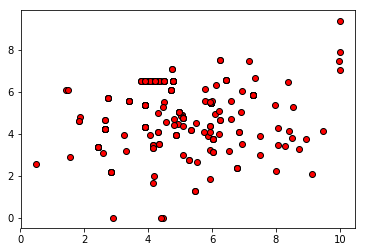

In [61]:
# make scatterplot of data using ? and ? 
plt.scatter(taxation, economy, marker="o", facecolors="red", edgecolors="black",
             alpha=1)
plt.savefig("../scatter_Safety_Economy.png")


No handles with labels found to put in legend.


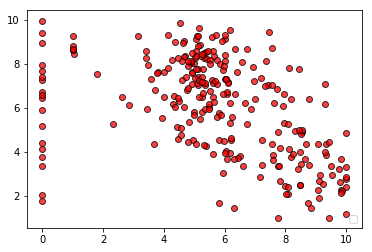

In [30]:
# make scatterplot of data using ? and ? 
plt.scatter(cost_of_living, environmental_quality, marker="o", facecolors="red", edgecolors="black", 
             alpha=0.75)
plt.legend(loc="lower right")
plt.savefig("../scatter_COL_Environmental.png")

In [37]:
# Create an array that contains the number of users each language has
# users = [13000, 26000, 52000, 30000, 9000]
users = city_data['Singapore']
stdf = soccer_2018_df.loc[soccer_2018_df["Preferred Position"] == "ST", :]

print(users)
# x_axis = np.arange(len(users))

KeyError: 'Singapore'

In [ ]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

In [ ]:
# Give our chart some labels and a tile
plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")


In [27]:
locations=city_data[["longitude","latitude"]]
heatmapscore=city_data["teleport_score"].astype(float)

fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=heatmapscore, 
                                 dissipating=False
#                                  , max_intensity=5
                                 ,
                                 point_radius=3
                                 , gradient = [
#                                      'maroon','red','navy',
                                     'blue','yellow'
#                                      ,'green'
                                 ]
                                )

# heatmap.gradient = 
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))